In [ ]:
from time import perf_counter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
def plot_gallery(images):
# Affiche les 12 premières images contenues dans images
# images est de taille Nb image*Ny*Nx plt.figure(figsize=(7.2, 7.2))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35) 
  for i in range(12):
    plt.subplot(3, 4, i + 1) 
    plt.imshow(images[i], cmap=plt.cm.gray) 
    plt.xticks(())
    plt.yticks(())
  plt.show()

taille des images 62x47 = 2914
nombre d'images = 1288
nombde de classe 7
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


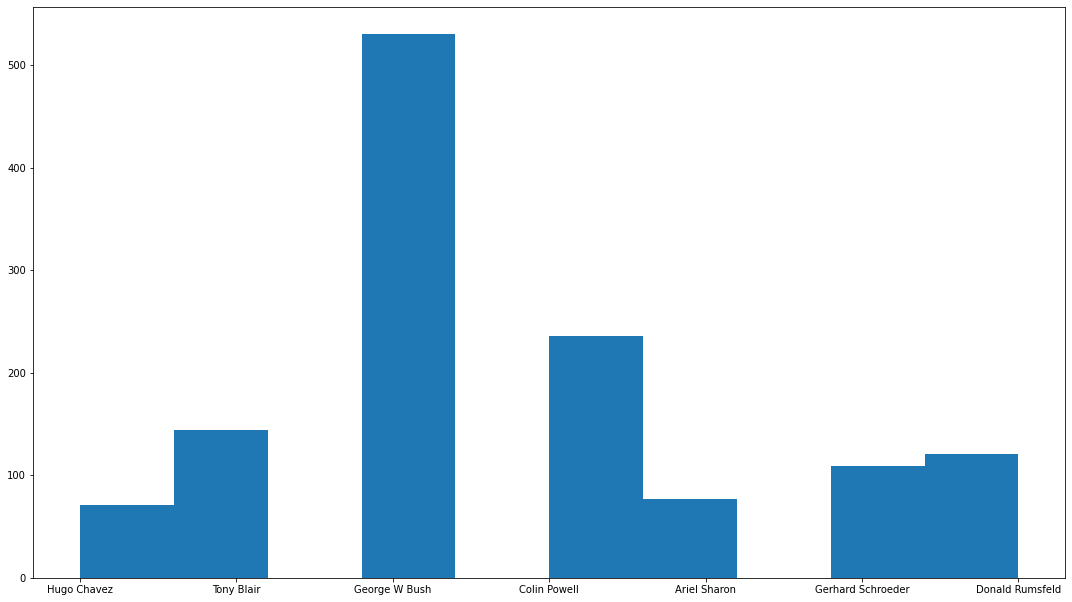

In [ ]:
[X, y, name]=np.load("TP1.npy",allow_pickle=True )
print("taille des images ",np.shape(X[0])[0],"x",np.shape(X[0])[1]," = ",np.size(X[0]),sep='')
print("nombre d'images =",len(X))
print("nombre de classe",len(name))
print(name)
fig = plt.figure(1)
plt.hist([name[i] for i in y ])
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()


In [ ]:
def train_test_split(X):
  X_test = []
  y_test = []
  liste = np.random.choice(range(len(X)),int(len(X)*0.25),replace=False)
  for i in liste:
    X_test.append(X[i])
    y_test.append(y[i])
  X_train = [_ for i , _ in enumerate(X) if i not in liste ]
  y_train = [_ for i , _ in enumerate(y) if i not in liste ]

  return X_train, y_train, X_test, y_test 


In [ ]:
X_train, y_train, X_test, y_test = train_test_split(X)
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(966, 62, 47)
(966,)
(322, 62, 47)
(322,)


In [ ]:
X_train = np.reshape(X_train,(np.shape(X_train)[0],np.shape(X)[1] * np.shape(X)[2]))
X_test = np.reshape(X_test,(np.shape(X_test)[0],np.shape(X)[1] * np.shape(X)[2]))
print(np.shape(X_train))
print(np.shape(X_test))

(966, 2914)
(322, 2914)


(966, 966)
(322, 966)


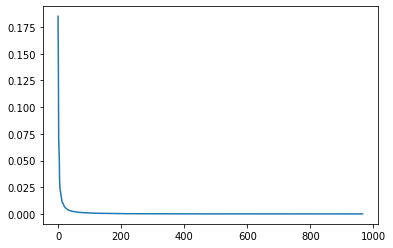

In [ ]:
pca = PCA()
pca.fit(X_train)
plt.plot(pca.explained_variance_ratio_)
X_train1 = pca.transform(X_train)
X_test1 = pca.transform(X_test)
print(np.shape(X_train1))
print(np.shape(X_test1))

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
print(np.shape(X_train))
print(np.shape(X_train1))
tps1 = perf_counter()
neigh.fit(X_train1, y_train)
tps2 = perf_counter()
print("Durée de classification Avec PCA",tps2 - tps1)

y_pred = neigh.predict(X_test1)
print("Taux de reconnaissance Avec PCA",accuracy_score(y_test, y_pred, normalize=False))


tps1 = perf_counter()
neigh.fit(X_train, y_train)
tps2 = perf_counter()
print("Durée de classification Sans PCA",tps2 - tps1)

y_pred = neigh.predict(X_test)
print("Taux de reconnaissance Sans PCA",accuracy_score(y_test, y_pred, normalize=False))

(966, 2914)
(966, 966)
Durée de classification Avec PCA 0.0026200250003967085
Taux de reconnaissance Avec PCA 208
Durée de classification Sans PCA 0.004215979000036896
Taux de reconnaissance Sans PCA 203


(966, 966)
(322, 966)


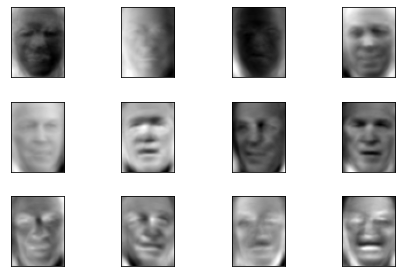

In [ ]:
pca = PCA(n_components=50)
pca.fit(X_train)
X_train2 = pca.transform(X_train)
X_test2 = pca.transform(X_test)
print(np.shape(X_train1))
print(np.shape(X_test1))
plot_gallery(np.reshape(pca.components_ ,(np.shape(pca.components_)[0],np.shape(X)[1], np.shape(X)[2])))

1159200
3753232


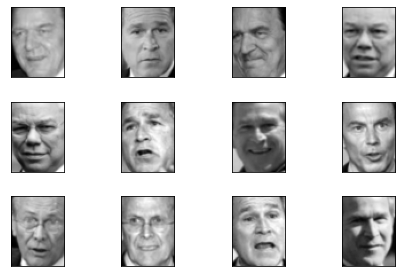

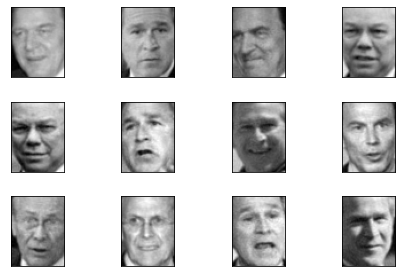

72.55329


In [ ]:
X_testC = pca.transform(X_test)
X_testR = pca.inverse_transform(X_testC)
print(X_testC.nbytes)
print(X_testR.nbytes)

plot_gallery(np.reshape(X_test ,(np.shape(X_test)[0],np.shape(X)[1], np.shape(X)[2])))
plot_gallery(np.reshape(X_testR ,(np.shape(X_testR)[0],np.shape(X)[1], np.shape(X)[2])))
E= (X_testR-X_test)**2
E = np.mean(np.sqrt(np.sum(E,axis=0)))
print(E)

In [ ]:
n_components_list = [10] + list(np.arange(50,950,50))
E_list = []
for n_components in n_components_list:
  pca = PCA(n_components=n_components)
  pca.fit(X_train)
  X_testC = pca.transform(X_test)
  X_testR = pca.inverse_transform(X_testC)

  E = (X_testR-X_test)**2
  E = np.mean(np.sqrt(np.sum(E,axis=0)))
  E_list.append(E)


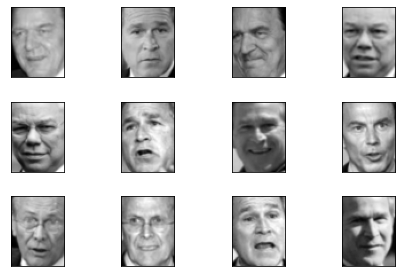

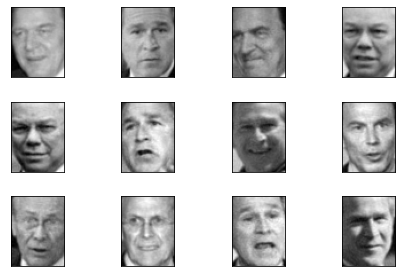

In [ ]:
plot_gallery(np.reshape(X_test ,(np.shape(X_test)[0],np.shape(X)[1], np.shape(X)[2])))
plot_gallery(np.reshape(X_testR ,(np.shape(X_testR)[0],np.shape(X)[1], np.shape(X)[2])))

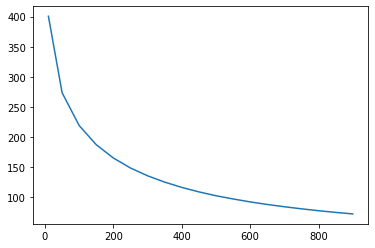

In [ ]:
plt.plot(n_components_list,E_list)